# Stock Selection Strategy Analysis

Clean notebook for exploratory analysis using helper functions


In [12]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import *
from helper_functions import *

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


## 1. Load Data


In [13]:
# Load OHLC data
daily_df = load_data(DATA_FILE)

print(f"Data loaded: {len(daily_df):,} rows")
print(f"Date range: {daily_df['date'].min()} to {daily_df['date'].max()}")
print(f"Unique tickers: {daily_df['ticker'].nunique()}")
print(f"\nFirst few rows:")
daily_df.head()


Data loaded: 112,432 rows
Date range: 2016-04-01 00:00:00 to 2025-09-26 00:00:00
Unique tickers: 79

First few rows:


,date,ticker,open,high,low,close,volume,isin
0,2016-04-01,ACC,1371.25,1417.00,1371.25,1413.80,353030.0,INE012A01025
1,2016-04-01,ADANIPORTS,248.00,248.00,239.50,242.90,1772898.0,INE742F01042
2,2016-04-01,AMBUJACEM,231.90,236.40,229.15,235.35,1438907.0,INE079A01024
3,2016-04-01,ASIANPAINT,871.00,883.95,865.00,870.00,853331.0,INE021A01026
4,2016-04-01,AXISBANK,440.90,452.00,440.05,449.90,8827751.0,INE238A01034


## 2. Explore Single Period Scoring


In [14]:
# Calculate scores for January 2017 as example
year, month = 2017, 1
scores = calculate_combined_score_for_month(daily_df, year, month)

print(f"\n{MONTH_NAMES[month]} {year} Combined Scores:")
print(f"\nTop 10 Selected Stocks:")
scores.head(10)[['ticker', 'yearly_return', 'quarterly_return', 'monthly_return', 'weekly_return', 'combined_score']]



January 2017 Combined Scores:

Top 10 Selected Stocks:


,ticker,yearly_return,quarterly_return,monthly_return,weekly_return,combined_score
0,VEDL,140.835655,24.331320,-7.251663,0.000000,39.478828
1,HINDALCO,77.200000,0.355987,-12.302036,5.486044,17.684999
2,CAIRN,56.731392,19.580247,-5.778210,0.000000,17.633357
3,MARUTI,43.754138,-6.031620,1.016901,6.669110,11.352132
4,GAIL,23.840406,17.763775,3.098592,0.159091,11.215466
5,NTPC,28.010878,10.756303,0.980693,-1.666162,9.520428
6,YESBANK,34.003476,-9.298039,-1.637322,8.960882,8.007249
7,POWERGRID,31.258941,3.584533,-4.675325,1.662125,7.957569
8,TATASTEEL,23.170156,3.807376,-6.253744,9.772525,7.624078
9,SBIN,29.168818,-1.106719,-3.639515,-1.663366,5.689804


## 3. Load Consolidated Results


In [15]:
# Load consolidated summary
consolidated_df = pd.read_csv(CONSOLIDATED_SUMMARY_CSV)
consolidated_df['trading_start'] = pd.to_datetime(consolidated_df['trading_start'])
consolidated_df['trading_end'] = pd.to_datetime(consolidated_df['trading_end'])

print(f"Loaded {len(consolidated_df)} periods")
print(f"Period range: {consolidated_df['period'].iloc[0]} to {consolidated_df['period'].iloc[-1]}")
consolidated_df.head(10)


Loaded 105 periods
Period range: 2017-01 January to 2025-09 September


,period,year,month,month_name,trading_start,trading_end,trading_days,top10_return,top25_return,nifty50_return,top10_outperformance,top25_outperformance,top10_tickers,periods_used
0,2017-01 January,2017,1,January,2017-01-08,2017-02-07,21,9.913995,6.061092,6.600857,3.313138,-0.539765,"VEDL, HINDALCO, CAIRN, MARUTI, GAIL...",2016-04 to 2016-12
1,2017-02 February,2017,2,February,2017-02-08,2017-03-07,19,-0.806110,-0.774643,0.585137,-1.391248,-1.359781,"VEDL, HINDALCO, CAIRN, MARUTI, GAIL...",2016-04 to 2016-12
2,2017-03 March,2017,3,March,2017-03-08,2017-04-07,21,2.371100,3.529369,1.734695,0.636404,1.794674,"VEDL, HINDALCO, CAIRN, MARUTI, SBIN...",2016-04 to 2016-12
3,2017-04 April,2017,4,April,2017-04-08,2017-05-07,18,-1.047832,-0.051865,-0.145325,-0.902507,0.093460,"VEDL, HINDALCO, YESBANK, MARUTI, CAIRN...",2016-04 to 2016-12
4,2017-05 May,2017,5,May,2017-05-08,2017-06-07,22,-0.551353,1.662640,1.530695,-2.082048,0.131945,"VEDL, HINDALCO, YESBANK, MARUTI, CAIRN...",2016-04 to 2016-12
5,2017-06 June,2017,6,June,2017-06-08,2017-07-07,21,1.771991,-0.267332,-1.529546,3.301537,1.262214,"VEDL, HINDALCO, MARUTI, YESBANK, TATASTEEL...",2016-04 to 2016-12
6,2017-07 July,2017,7,July,2017-07-08,2017-08-07,21,8.939409,2.319464,1.416356,7.523053,0.903108,"VEDL, HINDALCO, MARUTI, CAIRN, TATASTEEL...",2016-04 to 2016-12
7,2017-08 August,2017,8,August,2017-08-08,2017-09-07,21,2.519469,-2.633958,-2.213855,4.733324,-0.420103,"VEDL, HINDALCO, MARUTI, CAIRN, YESBANK...",2016-04 to 2016-12
8,2017-09 September,2017,9,September,2017-09-08,2017-10-07,20,-9.421066,-3.863657,-0.463624,-8.957441,-3.400032,"VEDL, HINDALCO, MARUTI, CAIRN, TATASTEEL...",2016-04 to 2016-12
9,2017-10 October,2017,10,October,2017-10-08,2017-11-07,21,2.398903,3.220988,3.545383,-1.146480,-0.324395,"VEDL, HINDALCO, CAIRN, GAIL, MARUTI...",2016-04 to 2016-12


## 4. Performance Analysis


In [16]:
# Calculate cumulative returns
consolidated_df['top10_cumulative'] = ((1 + consolidated_df['top10_return'] / 100).cumprod() - 1) * 100
consolidated_df['top25_cumulative'] = ((1 + consolidated_df['top25_return'] / 100).cumprod() - 1) * 100
consolidated_df['nifty50_cumulative'] = ((1 + consolidated_df['nifty50_return'] / 100).cumprod() - 1) * 100

print("Final Cumulative Returns:")
print(f"  Top 10:  {consolidated_df['top10_cumulative'].iloc[-1]:+.2f}%")
print(f"  Top 25:  {consolidated_df['top25_cumulative'].iloc[-1]:+.2f}%")
print(f"  Nifty 50: {consolidated_df['nifty50_cumulative'].iloc[-1]:+.2f}%")


Final Cumulative Returns:
  Top 10:  +60.01%
  Top 25:  +80.79%
  Nifty 50: +81.68%


In [17]:
# Summary statistics
summary_stats = pd.DataFrame({
    'Portfolio': ['Top 10', 'Top 25', 'Nifty 50'],
    'Avg Return (%)': [
        consolidated_df['top10_return'].mean(),
        consolidated_df['top25_return'].mean(),
        consolidated_df['nifty50_return'].mean()
    ],
    'Std Dev (%)': [
        consolidated_df['top10_return'].std(),
        consolidated_df['top25_return'].std(),
        consolidated_df['nifty50_return'].std()
    ],
    'Min (%)': [
        consolidated_df['top10_return'].min(),
        consolidated_df['top25_return'].min(),
        consolidated_df['nifty50_return'].min()
    ],
    'Max (%)': [
        consolidated_df['top10_return'].max(),
        consolidated_df['top25_return'].max(),
        consolidated_df['nifty50_return'].max()
    ]
})

print("\nPerformance Statistics:")
summary_stats.round(2)



Performance Statistics:


,Portfolio,Avg Return (%),Std Dev (%),Min (%),Max (%)
0,Top 10,0.62,5.83,-23.20,15.34
1,Top 25,0.68,4.70,-17.02,14.43
2,Nifty 50,0.68,4.74,-18.16,14.72


In [18]:
# Win rate analysis
top10_wins = (consolidated_df['top10_outperformance'] > 0).sum()
top25_wins = (consolidated_df['top25_outperformance'] > 0).sum()
total_periods = len(consolidated_df)

print(f"\nWin Rates (vs Nifty 50):")
print(f"  Top 10: {top10_wins}/{total_periods} ({top10_wins/total_periods*100:.1f}%)")
print(f"  Top 25: {top25_wins}/{total_periods} ({top25_wins/total_periods*100:.1f}%)")

print(f"\nAverage Outperformance:")
print(f"  Top 10: {consolidated_df['top10_outperformance'].mean():+.2f}% per period")
print(f"  Top 25: {consolidated_df['top25_outperformance'].mean():+.2f}% per period")



Win Rates (vs Nifty 50):
  Top 10: 55/105 (52.4%)
  Top 25: 53/105 (50.5%)

Average Outperformance:
  Top 10: -0.06% per period
  Top 25: -0.01% per period


## 5. Visualizations


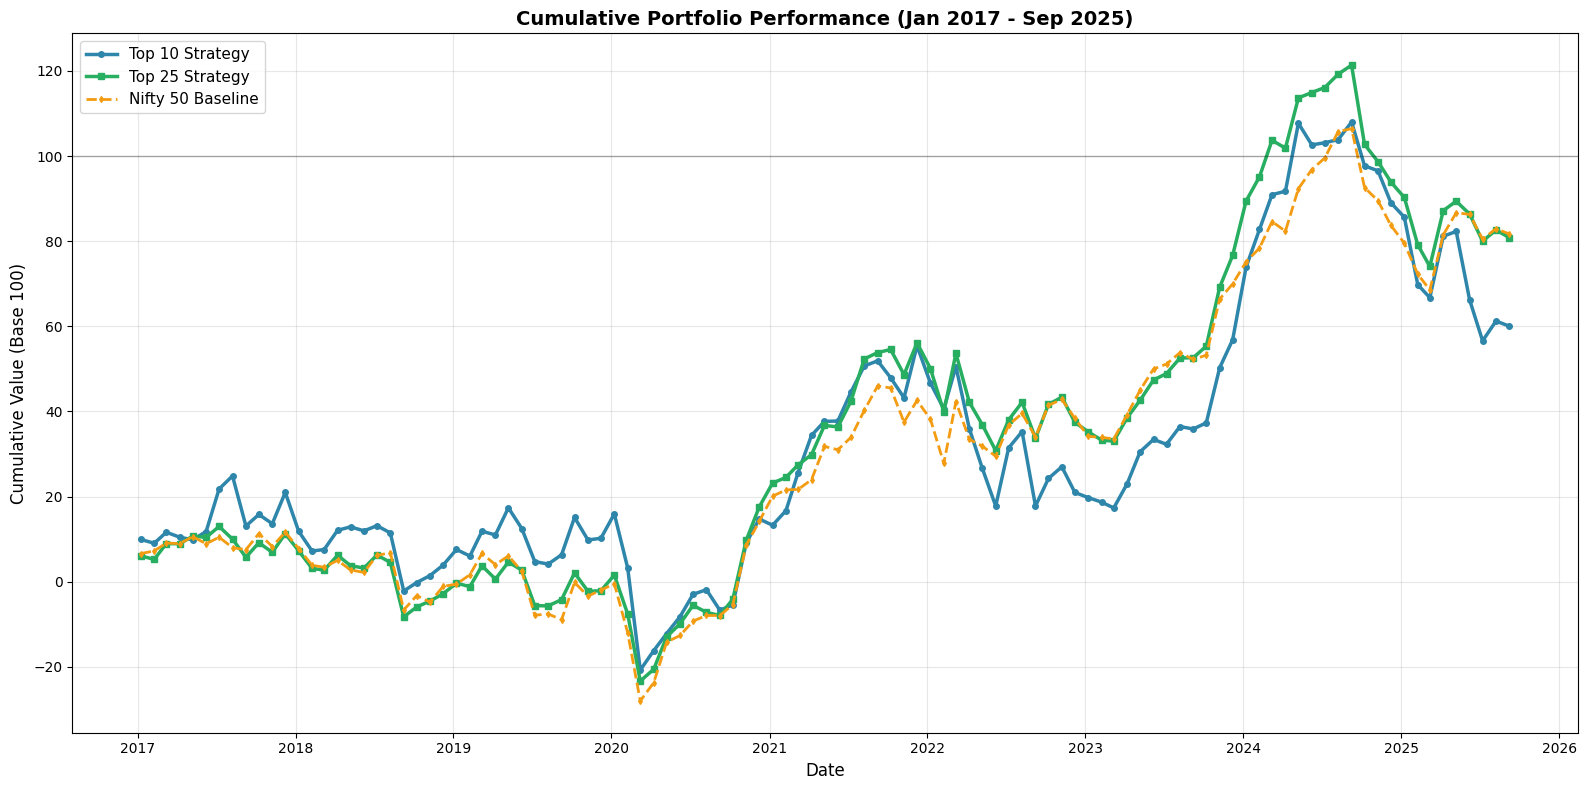

In [19]:
# Cumulative performance chart
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(consolidated_df['trading_start'], consolidated_df['top10_cumulative'],
        label='Top 10 Strategy', color=COLORS['top10'], linewidth=2.5, marker='o', markersize=4)

ax.plot(consolidated_df['trading_start'], consolidated_df['top25_cumulative'],
        label='Top 25 Strategy', color=COLORS['top25'], linewidth=2.5, marker='s', markersize=4)

ax.plot(consolidated_df['trading_start'], consolidated_df['nifty50_cumulative'],
        label='Nifty 50 Baseline', color=COLORS['nifty50'], linewidth=2, linestyle='--', marker='d', markersize=3)

ax.axhline(100, color='black', linestyle='-', linewidth=1, alpha=0.3)
ax.set_title('Cumulative Portfolio Performance (Jan 2017 - Sep 2025)', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Cumulative Value (Base 100)', fontsize=12)
ax.legend(loc='upper left', fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 6. Year-by-Year Analysis


In [20]:
# Load yearly summary
yearly_summary = pd.read_csv(YEARLY_SUMMARY_CSV)

print("Yearly Average Returns:")
yearly_summary[['year', 'top10_return_mean', 'top25_return_mean', 'nifty50_return_mean', 'top10_win_rate_%']].round(2)


Yearly Average Returns:


,year,top10_return_mean,top25_return_mean,nifty50_return_mean,top10_win_rate_%
0,2017,1.72,0.93,0.95,58.33
1,2018,-1.15,-1.03,-0.91,41.67
2,2019,0.59,0.14,0.04,50.00
3,2020,0.82,1.87,1.67,50.00
4,2021,2.63,2.43,1.92,58.33
5,2022,-1.81,-0.90,-0.11,33.33
6,2023,2.24,2.15,1.77,66.67
7,2024,1.67,0.86,0.70,66.67
8,2025,-1.69,-0.71,-0.06,44.44


## 7. Summary Report


In [21]:
# Create a quick summary report
summary = f"""
STRATEGY PERFORMANCE SUMMARY
{'='*60}

Analysis Period: {consolidated_df['period'].iloc[0]} to {consolidated_df['period'].iloc[-1]}
Total Periods: {len(consolidated_df)}

CUMULATIVE RETURNS:
  Top 10:    {consolidated_df['top10_cumulative'].iloc[-1]:+.2f}%
  Top 25:    {consolidated_df['top25_cumulative'].iloc[-1]:+.2f}%
  Nifty 50:  {consolidated_df['nifty50_cumulative'].iloc[-1]:+.2f}%

AVERAGE MONTHLY RETURNS:
  Top 10:    {consolidated_df['top10_return'].mean():+.2f}%
  Top 25:    {consolidated_df['top25_return'].mean():+.2f}%
  Nifty 50:  {consolidated_df['nifty50_return'].mean():+.2f}%

WIN RATE (vs Nifty 50):
  Top 10:    {top10_wins}/{total_periods} ({top10_wins/total_periods*100:.1f}%)
  Top 25:    {top25_wins}/{total_periods} ({top25_wins/total_periods*100:.1f}%)

RISK METRICS:
  Top 10 Std Dev:     {consolidated_df['top10_return'].std():.2f}%
  Top 10 Min Return:  {consolidated_df['top10_return'].min():+.2f}%
  Top 10 Max Return:  {consolidated_df['top10_return'].max():+.2f}%

{'='*60}
"""

print(summary)



STRATEGY PERFORMANCE SUMMARY

Analysis Period: 2017-01 January to 2025-09 September
Total Periods: 105

CUMULATIVE RETURNS:
  Top 10:    +60.01%
  Top 25:    +80.79%
  Nifty 50:  +81.68%

AVERAGE MONTHLY RETURNS:
  Top 10:    +0.62%
  Top 25:    +0.68%
  Nifty 50:  +0.68%

WIN RATE (vs Nifty 50):
  Top 10:    55/105 (52.4%)
  Top 25:    53/105 (50.5%)

RISK METRICS:
  Top 10 Std Dev:     5.83%
  Top 10 Min Return:  -23.20%
  Top 10 Max Return:  +15.34%


